In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sn

In [2]:
files=['aug_train.csv','aug_test.csv']
df=pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis=0)
df.to_csv('final_dataset.csv', index=False)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,NaN
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,NaN
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,NaN
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,NaN


Initial Study of the dataset for project proposal

In [3]:
print(len(df.axes[0]))
print(df.axes[1])

21287
Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')


In [4]:
print(df.info())
df.size

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 0 to 2128
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
mem

298018

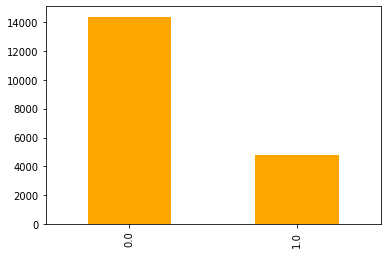

In [5]:
df['target'].value_counts().plot(kind='bar',color='orange')
plt.show()

In [6]:
print(df.corr())

                        enrollee_id  city_development_index  training_hours  \
enrollee_id                1.000000               -0.040916        0.001222   
city_development_index    -0.040916                1.000000       -0.000556   
training_hours             0.001222               -0.000556        1.000000   
target                     0.049475               -0.341665       -0.021577   

                          target  
enrollee_id             0.049475  
city_development_index -0.341665  
training_hours         -0.021577  
target                  1.000000  


In [7]:
correlation_matrix=df.corr().round(2)

<AxesSubplot:>

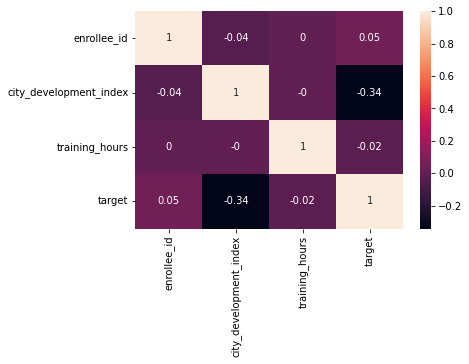

In [8]:
sn.heatmap(data=correlation_matrix, annot=True)


Exploratory Data Analysis and Preprocessing

In [9]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64

In [10]:
for col in df.columns:
    # Use the unique() function to get the distinct values in each column
    distinct_values = df[col].unique()
    print(f"Distinct values in {col}: {distinct_values}")

Distinct values in enrollee_id: [ 8949 29725 11561 ... 31762  7873 12215]
Distinct values in city: ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'ci

In [11]:
df=df.drop('enrollee_id', axis=1)
df=df.drop('city', axis=1)

Encoding categorial data

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
rel_exp_order=['No relevent experience','Has relevent experience']
ord_enc=OrdinalEncoder(categories=[rel_exp_order])
df['relevent_experience']=ord_enc.fit_transform(df[['relevent_experience']])
df['relevent_experience'].unique()

array([1., 0.])

In [13]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [14]:
df=df.dropna(subset=['education_level'])
df=df.dropna(subset=['company_size'])
df=df.dropna(subset=['last_new_job'])
df=df.dropna(subset=['enrolled_university'])
df=df.dropna(subset=['experience'])
df.size

169740

In [15]:
edu_level_order=['Primary School','High School','Graduate','Masters','Phd']
ord_enc=OrdinalEncoder(categories=[edu_level_order])
df['education_level']=ord_enc.fit_transform(df[['education_level']])
df['education_level'].unique()

array([2., 3., 1., 4., 0.])

In [16]:
df.major_discipline=df.major_discipline.fillna('No Major')
df['major_discipline'].unique()

array(['STEM', 'No Major', 'Humanities', 'Business Degree', 'Other',
       'Arts'], dtype=object)

In [17]:
maj_dis_order=['No Major','Other','Arts','Humanities','Business Degree','STEM']
ord_enc=OrdinalEncoder(categories=[maj_dis_order])
df['major_discipline']=ord_enc.fit_transform(df[['major_discipline']])
df['major_discipline'].unique()

array([5., 0., 3., 4., 1., 2.])

In [18]:
print(df.index.is_unique)
df = df.reset_index(drop=True)


False


In [19]:
from sklearn.preprocessing import OneHotEncoder
#one_hot_enc.fit_transform(data[['column']])
onehot_enc=OneHotEncoder(handle_unknown='ignore')
enrolled_uni_encoded=onehot_enc.fit_transform(df[['enrolled_university']]).toarray()
course=pd.DataFrame(enrolled_uni_encoded)
course.columns=onehot_enc.get_feature_names_out(['enrolled_university'])

gender_enc=onehot_enc.fit_transform(df[['gender']]).toarray()
gender_new=pd.DataFrame(gender_enc)
gender_new.columns=onehot_enc.get_feature_names_out(['gender'])

company_enc=onehot_enc.fit_transform(df[['company_type']]).toarray()
company_new=pd.DataFrame(company_enc)
company_new.columns=onehot_enc.get_feature_names_out(['company_type'])
new_df=pd.concat([df,course,gender_new,company_new],axis=1)

new_df=new_df.drop('enrolled_university',axis=1)
new_df=new_df.drop('gender',axis=1)
new_df=new_df.drop('gender_nan',axis=1)
new_df=new_df.drop('company_type',axis=1)
new_df=new_df.drop('company_type_nan',axis=1)
new_df


,city_development_index,relevent_experience,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,enrolled_university_Full time course,...,enrolled_university_no_enrollment,gender_Female,gender_Male,gender_Other,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.776,0.0,2.0,5.0,15,50-99,>4,47,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.767,1.0,3.0,5.0,>20,50-99,4,8,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.920,1.0,1.0,0.0,5,50-99,1,24,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.762,1.0,2.0,5.0,13,<10,>4,18,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.920,1.0,2.0,5.0,7,50-99,1,46,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,0.939,1.0,1.0,0.0,>20,100-500,2,58,NaN,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14141,0.725,0.0,2.0,5.0,7,<10,never,160,NaN,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14142,0.878,0.0,3.0,5.0,16,<10,>4,58,NaN,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14143,0.804,1.0,1.0,0.0,7,100-500,1,84,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
#df['Fee'] = np.where(df['Fee'] >= 22000, 15000, df['Fee'])
#new_df['company_size'] = np.where(df['company_size'] == 50-99, 75,new_df['company_size'])
new_df['company_size'] = new_df['company_size'].mask(new_df['company_size']=='50-99',75)
new_df['company_size']=new_df['company_size'].mask(new_df['company_size']=='5000-9999',7500)
new_df['company_size']=new_df['company_size'].mask(new_df['company_size']=='1000-4999',3000)
new_df['company_size']=new_df['company_size'].mask(new_df['company_size']=='100-500',300)
new_df['company_size']=new_df['company_size'].mask(new_df['company_size']=='500-999',750)
new_df['company_size']=new_df['company_size'].mask(new_df['company_size']=='10/49',30)
new_df['company_size']=new_df['company_size'].mask(new_df['company_size']=='<10',5)
new_df['company_size']=new_df['company_size'].mask(new_df['company_size']=='10000+',15000)
#new_df['company_size']=new_df['company_size'].replace(['50-99','74.5'],['<10','5'],['10000+','15000'],['5000-9999','7499.5'],['1000-4999','2999.5'])

In [21]:
new_df['company_size']

0           75
1           75
2           75
3            5
4           75
         ...  
14140      300
14141        5
14142        5
14143      300
14144    15000
Name: company_size, Length: 14145, dtype: object

In [22]:
new_df=new_df.dropna(subset=['experience'])
new_df['experience']=new_df['experience'].mask(new_df['experience']=='>20','21')
new_df['experience']=new_df['experience'].mask(new_df['experience']=='<1','0')

exp_order=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21']
ord_enc=OrdinalEncoder(categories=[exp_order])
new_df['experience']=ord_enc.fit_transform(new_df[['experience']])
new_df['experience'].unique()

array([15., 21.,  5., 13.,  7., 17., 16.,  1.,  2., 11.,  0., 14., 18.,
       19., 12., 10.,  4.,  6.,  9.,  3.,  8., 20.])

In [23]:
new_df=new_df.dropna(subset=['last_new_job'])
new_df['last_new_job']=new_df['last_new_job'].mask(new_df['last_new_job']=='>4','5')
new_df['last_new_job']=new_df['last_new_job'].mask(new_df['last_new_job']=='never','0')

job_order=['0','1','2','3','4','5']
ord_enc=OrdinalEncoder(categories=[job_order])
new_df['last_new_job']=ord_enc.fit_transform(new_df[['last_new_job']])
new_df['last_new_job'].unique()

array([5., 4., 1., 3., 0., 2.])

In [24]:
new_df

,city_development_index,relevent_experience,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,enrolled_university_Full time course,...,enrolled_university_no_enrollment,gender_Female,gender_Male,gender_Other,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.776,0.0,2.0,5.0,15.0,75,5.0,47,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.767,1.0,3.0,5.0,21.0,75,4.0,8,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.920,1.0,1.0,0.0,5.0,75,1.0,24,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.762,1.0,2.0,5.0,13.0,5,5.0,18,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.920,1.0,2.0,5.0,7.0,75,1.0,46,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,0.939,1.0,1.0,0.0,21.0,300,2.0,58,NaN,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14141,0.725,0.0,2.0,5.0,7.0,5,0.0,160,NaN,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14142,0.878,0.0,3.0,5.0,16.0,5,5.0,58,NaN,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14143,0.804,1.0,1.0,0.0,7.0,300,1.0,84,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
new_df.isnull().sum()

city_development_index                     0
relevent_experience                        0
education_level                            0
major_discipline                           0
experience                                 0
company_size                               0
last_new_job                               0
training_hours                             0
target                                  1441
enrolled_university_Full time course       0
enrolled_university_Part time course       0
enrolled_university_no_enrollment          0
gender_Female                              0
gender_Male                                0
gender_Other                               0
company_type_Early Stage Startup           0
company_type_Funded Startup                0
company_type_NGO                           0
company_type_Other                         0
company_type_Public Sector                 0
company_type_Pvt Ltd                       0
dtype: int64

In [26]:
new_df=new_df.dropna(subset=['target'])


In [27]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
col_to_scale = new_df['training_hours']
scaler = StandardScaler()
scaler.fit(col_to_scale.values.reshape(-1, 1))
scaled_col = scaler.transform(col_to_scale.values.reshape(-1, 1)).flatten()
new_df['training_hours'] = scaled_col


col_to_scale=new_df['company_size']
scaler.fit(col_to_scale.values.reshape(-1, 1))
scaled_col = scaler.transform(col_to_scale.values.reshape(-1, 1)).flatten()
new_df['company_size']=scaled_col

<ipython-input-27-fe996a3260b1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['training_hours'] = scaled_col
<ipython-input-27-fe996a3260b1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['company_size']=scaled_col


In [28]:
new_df

,city_development_index,relevent_experience,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,enrolled_university_Full time course,...,enrolled_university_no_enrollment,gender_Female,gender_Male,gender_Other,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.776,0.0,2.0,5.0,15.0,-0.559195,5.0,-0.308620,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.767,1.0,3.0,5.0,21.0,-0.559195,4.0,-0.951443,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.920,1.0,1.0,0.0,5.0,-0.559195,1.0,-0.687721,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.762,1.0,2.0,5.0,13.0,-0.572258,5.0,-0.786616,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.920,1.0,2.0,5.0,7.0,-0.559195,1.0,-0.325103,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12699,0.920,1.0,3.0,5.0,9.0,-0.559195,1.0,-0.489929,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12700,0.920,1.0,2.0,5.0,10.0,-0.517206,3.0,-0.704203,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12701,0.920,1.0,2.0,3.0,7.0,-0.567592,1.0,-0.671238,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12702,0.920,1.0,2.0,5.0,21.0,-0.559195,4.0,-0.358068,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

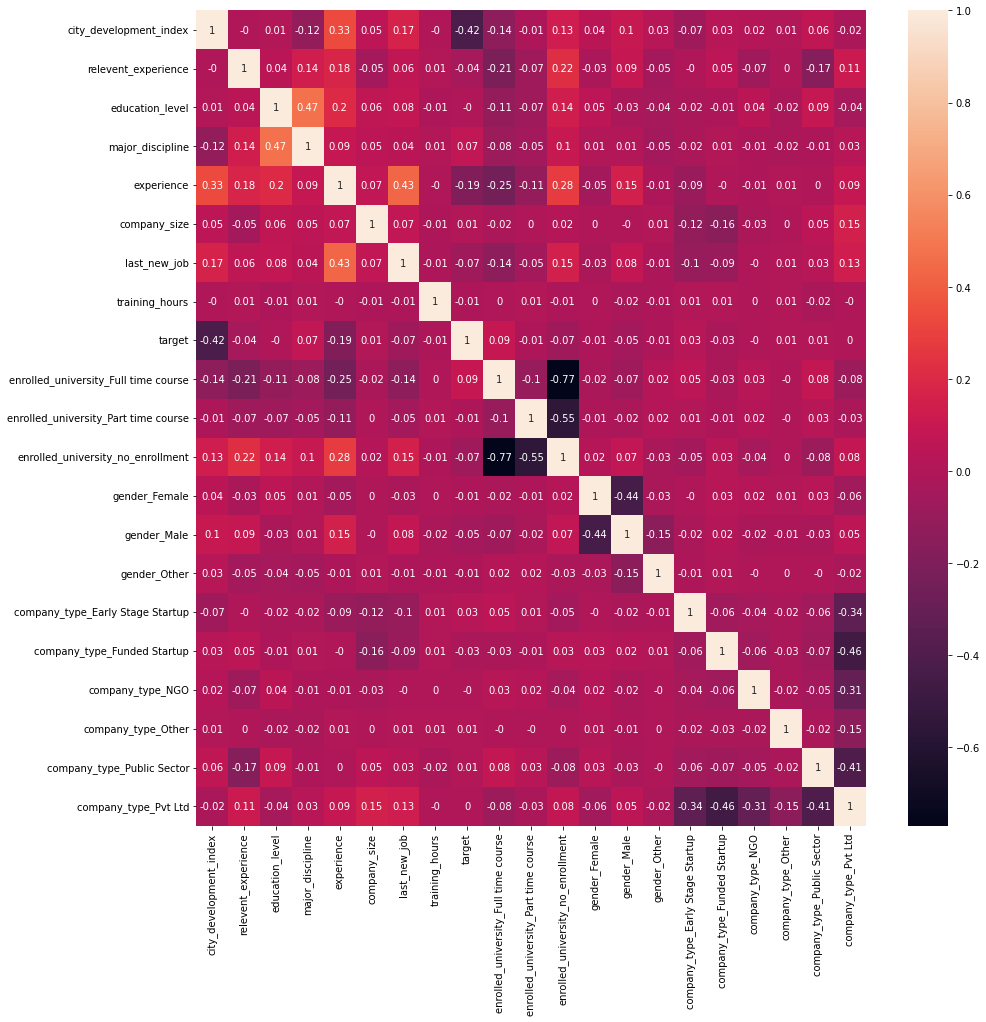

In [29]:
correlation_matrix=new_df.corr().round(2)
fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(data=correlation_matrix, annot=True, ax=ax)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
import time

In [31]:
new_df.isnull().sum()

city_development_index                  0
relevent_experience                     0
education_level                         0
major_discipline                        0
experience                              0
company_size                            0
last_new_job                            0
training_hours                          0
target                                  0
enrolled_university_Full time course    0
enrolled_university_Part time course    0
enrolled_university_no_enrollment       0
gender_Female                           0
gender_Male                             0
gender_Other                            0
company_type_Early Stage Startup        0
company_type_Funded Startup             0
company_type_NGO                        0
company_type_Other                      0
company_type_Public Sector              0
company_type_Pvt Ltd                    0
dtype: int64

In [32]:
val_df=new_df.loc[1:100]

x1=val_df.drop('target',axis=1)
y1=val_df['target']

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
X_val, X_val_test, y_val, y_val_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

param_grid = {'C': [0.05,0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.001,0.1, 1, 10], 'degree': [1,2, 3, 4]}
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
grid_search.fit(X_val, y_val)

print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'C': 0.05, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [34]:
final_df=new_df.loc[101:]
X=final_df.drop('target',axis=1)
y=final_df['target']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=42)

SVM Implementation

In [59]:
from sklearn import svm
start = time.time()
svm_clf = svm.SVC(kernel='linear',degree=1,gamma=0.001,C=0.05)
svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)
end = time.time()
print("SVM with linear kernel")
print(end - start, "seconds")
print("Accuracy=",accuracy_score(y_test,y_pred))
print("Precision=",precision_score(y_test,y_pred,zero_division=1))
print("Recall=",recall_score(y_test,y_pred))
print("F1 score=",f1_score(y_test,y_pred))
print("Cohen kappa score=",cohen_kappa_score(y_test,y_pred))

SVM with linear kernel
1.9342482089996338 seconds
Accuracy= 0.8230626818302037
Precision= 1.0
Recall= 0.0
F1 score= 0.0
Cohen kappa score= 0.0


In [60]:
start=time.time()
svm_clf=svm.SVC(kernel='poly', degree=1, gamma=0.01, C=0.05)
svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)
end=time.time()
print("SVM with polynomial kernel")
print(end - start, "seconds")
print("Accuracy=",accuracy_score(y_test,y_pred))
print("Precision=",precision_score(y_test,y_pred,zero_division=1))
print("Recall=",recall_score(y_test,y_pred))
print("F1 score=",f1_score(y_test,y_pred))
print("Cohen kappa score=",cohen_kappa_score(y_test,y_pred))

SVM with polynomial kernel
1.6024491786956787 seconds
Accuracy= 0.8230626818302037
Precision= 1.0
Recall= 0.0
F1 score= 0.0
Cohen kappa score= 0.0


In [61]:
start = time.time()
svm_clf=svm.SVC(kernel='sigmoid')
svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)
end = time.time()
print("SVM with sigmoid kernel")
print(end - start, "seconds")
accuracy1=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy1)
precision1=precision_score(y_test,y_pred,zero_division=1)
print("Precision=",precision1)
recall1=recall_score(y_test,y_pred)
print("Recall=",recall1)
f1_1=f1_score(y_test,y_pred)
print("F1 score=",f1_1)
cohen_kappa1=cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score=",cohen_kappa1)

SVM with sigmoid kernel
2.2428011894226074 seconds
Accuracy= 0.7386934673366834
Precision= 0.2115732368896926
Recall= 0.17488789237668162
F1 score= 0.1914893617021277
Cohen kappa score= 0.03732539477197083


In [62]:
start=time.time()
svm_clf=svm.SVC(kernel='rbf')
svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)
end=time.time()
print("SVM with rbf kernel")
print(end - start, "seconds")
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy)
precision=precision_score(y_test,y_pred,zero_division=1)
print("Precision=",precision)
recall=recall_score(y_test,y_pred)
print("Recall=",recall)
f1=f1_score(y_test,y_pred)
print("F1 score=",f1)
cohen_kappa=cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score=",cohen_kappa)

SVM with rbf kernel
4.9182868003845215 seconds
Accuracy= 0.8230626818302037
Precision= 1.0
Recall= 0.0
F1 score= 0.0
Cohen kappa score= 0.0


KNN Implementation

In [63]:
from sklearn.neighbors import KNeighborsClassifier
start=time.time()
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
end=time.time()
print("KNN with 100 neighbors") #change the value of n_nrighbors for different results
print(end - start, "seconds")
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy)
precision=precision_score(y_test,y_pred,zero_division=1)
print("Precision=",precision)
recall=recall_score(y_test,y_pred)
print("Recall=",recall)
f1=f1_score(y_test,y_pred)
print("F1 score=",f1)
cohen_kappa=cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score=",cohen_kappa)

KNN with 100 neighbors
1.2793467044830322 seconds
Accuracy= 0.8225337212377678
Precision= 0.375
Recall= 0.004484304932735426
F1 score= 0.008862629246676515
Cohen kappa score= 0.004700606072969737


In [64]:
#knn hyperparameter tuning using grid search
k_range = list(range(8, 91))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x1, y1)
print(grid_search.best_params_)


Fitting 10 folds for each of 83 candidates, totalling 830 fits
{'n_neighbors': 8}


In [65]:
#knn using the obtained value of k after grid search
start=time.time()
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
end=time.time()
print("KNN with k=8")
print(end - start, "seconds")
accuracy2=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy2)
precision2=precision_score(y_test,y_pred,zero_division=1)
print("Precision=",precision2)
recall2=recall_score(y_test,y_pred)
print("Recall=",recall2)
f1_2=f1_score(y_test,y_pred)
print("F1 score=",f1_2)
cohen_kappa2=cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score=",cohen_kappa2)

KNN with k=8
1.1527717113494873 seconds
Accuracy= 0.8225337212377678
Precision= 0.4875
Recall= 0.05829596412556054
F1 score= 0.1041388518024032
Cohen kappa score= 0.06894785148530491


Decision Tree implementation

In [66]:
from sklearn.tree import DecisionTreeClassifier
start=time.time()
dt=DecisionTreeClassifier(max_depth=12,random_state=42)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
end=time.time()
print("Decision tree with max depth=12") #change the value of max_depth for testing different depths
print(end - start, "seconds")
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy)
precision=precision_score(y_test,y_pred,zero_division=1)
print("Precision=",precision)
recall=recall_score(y_test,y_pred)
print("Recall=",recall)
f1=f1_score(y_test,y_pred)
print("F1 score=",f1)
cohen_kappa=cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score=",cohen_kappa)

Decision tree with max depth=12
0.035063743591308594 seconds
Accuracy= 0.8156572335361015
Precision= 0.47619047619047616
Recall= 0.41853512705530643
F1 score= 0.4455051710421638
Cohen kappa score= 0.3355080833883639


In [67]:
#decision tree hyperparameter tunung using grid search
from sklearn.pipeline import Pipeline
from sklearn import decomposition
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
dt=DecisionTreeClassifier()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('std_slc', scaler),
                           ('pca', pca),
                           ('dec_tree', dt)])
parameters = dict(dec_tree__criterion=criterion,dec_tree__max_depth=max_depth)
grid=GridSearchCV(pipe,parameters)
grid.fit(x1,y1)
print('Best Criterion:', grid.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', grid.best_estimator_.get_params()['dec_tree__max_depth'])
print(); print(grid.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 2

DecisionTreeClassifier(max_depth=2)


In [68]:
#decision tree using best max depth
start=time.time()
dt=DecisionTreeClassifier(max_depth=4,random_state=42,criterion='gini')
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
end=time.time()
print("Decision tree with max depth=8")
print(end - start, "seconds")
accuracy3=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy3)
precision3=precision_score(y_test,y_pred,zero_division=1)
print("Precision=",precision3)
recall3=recall_score(y_test,y_pred)
print("Recall=",recall3)
f1_3=f1_score(y_test,y_pred)
print("F1 score=",f1_3)
cohen_kappa3=cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score=",cohen_kappa3)

Decision tree with max depth=8
0.018520355224609375 seconds
Accuracy= 0.8555937582650093
Precision= 0.6054888507718696
Recall= 0.5276532137518685
F1 score= 0.5638977635782747
Cohen kappa score= 0.4778572689577866


Logistic Regression Implementation

In [69]:
from sklearn.linear_model import LogisticRegression
start=time.time()
lr=LogisticRegression(solver='liblinear', penalty='l2',C=5)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
end=time.time()
print("Logistic Regression with l2 and c=5")
print(end - start, "seconds")
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy)
precision=precision_score(y_test,y_pred,zero_division=1)
print("Precision=",precision)
recall=recall_score(y_test,y_pred)
print("Recall=",recall)
f1=f1_score(y_test,y_pred)
print("F1 score=",f1)
cohen_kappa=cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score=",cohen_kappa)

Logistic Regression with l2 and c=5
0.060251712799072266 seconds
Accuracy= 0.8360222163448823
Precision= 0.5853658536585366
Recall= 0.25112107623318386
F1 score= 0.35146443514644354
Cohen kappa score= 0.27437682433457244


In [70]:
#LR hyperparameter tuning using grid search
C = np.logspace(0,10)
penalty = ['l1', 'l2']
pipe = Pipeline(steps=[('std_slc', scaler),('pca', pca),('logistic_Reg', lr)])
parameters = dict(logistic_Reg__C=C,logistic_Reg__penalty=penalty)
grid=GridSearchCV(pipe,parameters)
grid.fit(x1,y1)
print('Best Penalty:', grid.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', grid.best_estimator_.get_params()['logistic_Reg__C'])
print(); print(grid.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l1
Best C: 1.0

LogisticRegression(penalty='l1', solver='liblinear')


In [71]:
start=time.time()
lr=LogisticRegression(solver='liblinear',penalty='l1',C=20)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
end=time.time()
print("Logistic regression with l1 and c=20")
print(end - start, "seconds")
accuracy4=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy4)
precision4=precision_score(y_test,y_pred,zero_division=1)
print("Precision=",precision4)
recall4=recall_score(y_test,y_pred)
print("Recall=",recall4)
f1_4=f1_score(y_test,y_pred)
print("F1 score=",f1_4)
cohen_kappa4=cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score=",cohen_kappa4)

Logistic regression with l1 and c=20
0.1929934024810791 seconds
Accuracy= 0.8357577360486643
Precision= 0.5827586206896552
Recall= 0.2526158445440957
F1 score= 0.3524504692387904
Cohen kappa score= 0.27485153456235867


Naive Bayes Implementation

In [72]:
from sklearn.naive_bayes import GaussianNB
start=time.time()
nbc=GaussianNB()
nbc.fit(X_train,y_train)
y_pred=nbc.predict(X_test)
end=time.time()
print("Gaussian Naive Bayes")
print(end - start, "seconds")
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy)
precision=precision_score(y_test,y_pred,zero_division=1)
print("Precision=",precision)
recall=recall_score(y_test,y_pred)
print("Recall=",recall)
f1=f1_score(y_test,y_pred)
print("F1 score=",f1)
cohen_kappa=cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score=",cohen_kappa)

Gaussian Naive Bayes
0.012548446655273438 seconds
Accuracy= 0.7974080930970643
Precision= 0.4423305588585018
Recall= 0.5560538116591929
F1 score= 0.4927152317880795
Cohen kappa score= 0.3681908494929813


In [49]:
#hyperparam tuning using grid search
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid= GridSearchCV(nbc, param_grid, cv=5, scoring='accuracy')
grid.fit(x1,y1)
print("Best hyperparameters: ", grid.best_params_)

Best hyperparameters:  {'var_smoothing': 1e-06}


In [73]:
start=time.time()
nbc=GaussianNB(var_smoothing=1e-6)
nbc.fit(X_train,y_train)
y_pred=nbc.predict(X_test)
end=time.time()
print("Gaussian Naive bayes with teh best hyperparam")
print(end - start, "seconds")
accuracy5=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy5)
precision5=precision_score(y_test,y_pred,zero_division=1)
print("Precision=",precision5)
recall5=recall_score(y_test,y_pred)
print("Recall=",recall5)
f1_5=f1_score(y_test,y_pred)
print("F1 score=",f1_5)
cohen_kappa5=cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score=",cohen_kappa5)

Gaussian Naive bayes with teh best hyperparam
0.009029388427734375 seconds
Accuracy= 0.7968791325046284
Precision= 0.4410011918951132
Recall= 0.5530642750373692
F1 score= 0.4907161803713528
Cohen kappa score= 0.3658653125918563


In [74]:
from sklearn.naive_bayes import BernoulliNB
start=time.time()
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
end=time.time()
print("Bernoulli Naive bayes")
print(end - start, "seconds")
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy)
precision=precision_score(y_test,y_pred,zero_division=1)
print("Precision=",precision)
recall=recall_score(y_test,y_pred)
print("Recall=",recall)
f1=f1_score(y_test,y_pred)
print("F1 score=",f1)
cohen_kappa=cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score=",cohen_kappa)

Bernoulli Naive bayes
0.015457868576049805 seconds
Accuracy= 0.8145993123512298
Precision= 0.18
Recall= 0.013452914798206279
F1 score= 0.025034770514603618
Cohen kappa score= 0.000436711030423087


In [75]:
#hyperparameter tuning using grid search
param_grid = {'alpha': [0.01,0.1,10, 50],
              'binarize': [-1, 0, 0.1, 0.5, 1, 5]}
grid_search = GridSearchCV(bnb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x1,y1)
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'alpha': 0.01, 'binarize': -1}


In [76]:
start=time.time()
bnb=BernoulliNB(alpha=0.01,binarize=-1)
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
end=time.time()
print("Gaussian Naive Bayes after hyperparameter tuning")
print(end - start, "seconds")
accuracy6=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy6)
precision6=precision_score(y_test,y_pred,zero_division=1)
print("Precision=",precision6)
recall6=recall_score(y_test,y_pred)
print("Recall=",recall6)
f1_6=f1_score(y_test,y_pred)
print("F1 score=",f1_6)
cohen_kappa6=cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score=",cohen_kappa6)

Gaussian Naive Bayes after hyperparameter tuning
0.012898683547973633 seconds
Accuracy= 0.8230626818302037
Precision= 1.0
Recall= 0.0
F1 score= 0.0
Cohen kappa score= 0.0


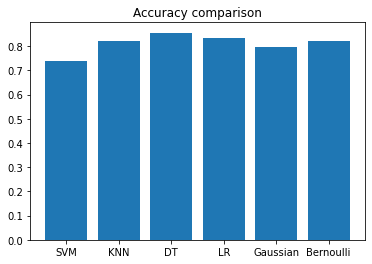

<Figure size 720x720 with 0 Axes>

In [54]:
data = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5,accuracy6]
labels = ['SVM', 'KNN', 'DT', 'LR', 'Gaussian','Bernoulli']

plt.bar(labels, data)

plt.title('Accuracy comparison')
plt.figure(figsize=(10, 10))

plt.show()


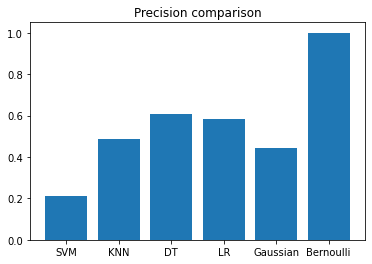

<Figure size 720x720 with 0 Axes>

In [55]:
data = [precision1, precision2, precision3, precision4, precision5,precision6]
labels = ['SVM', 'KNN', 'DT', 'LR', 'Gaussian','Bernoulli']

plt.bar(labels, data)

plt.title('Precision comparison')
plt.figure(figsize=(10, 10))

plt.show()


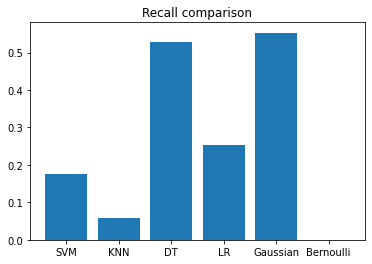

<Figure size 720x720 with 0 Axes>

In [56]:
data = [recall1, recall2, recall3, recall4, recall5, recall6]
labels = ['SVM', 'KNN', 'DT', 'LR', 'Gaussian','Bernoulli']

plt.bar(labels, data)

plt.title('Recall comparison')
plt.figure(figsize=(10, 10))

plt.show()


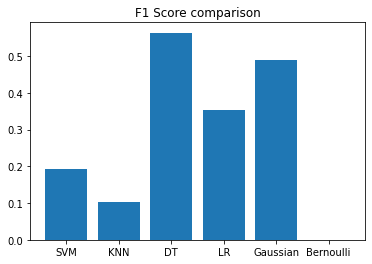

<Figure size 720x720 with 0 Axes>

In [57]:
data = [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6]
labels = ['SVM', 'KNN', 'DT', 'LR', 'Gaussian','Bernoulli']

plt.bar(labels, data)

plt.title('F1 Score comparison')
plt.figure(figsize=(10, 10))

plt.show()


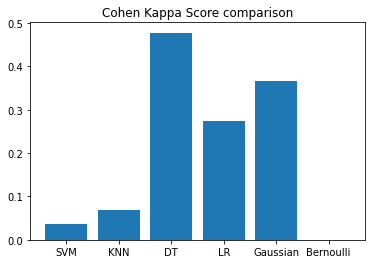

<Figure size 720x720 with 0 Axes>

In [58]:
data = [cohen_kappa1, cohen_kappa2, cohen_kappa3, cohen_kappa4, cohen_kappa5, cohen_kappa6]
labels = ['SVM', 'KNN', 'DT', 'LR', 'Gaussian','Bernoulli']

plt.bar(labels, data)

plt.title('Cohen Kappa Score comparison')
plt.figure(figsize=(10, 10))

plt.show()
